In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist.target[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

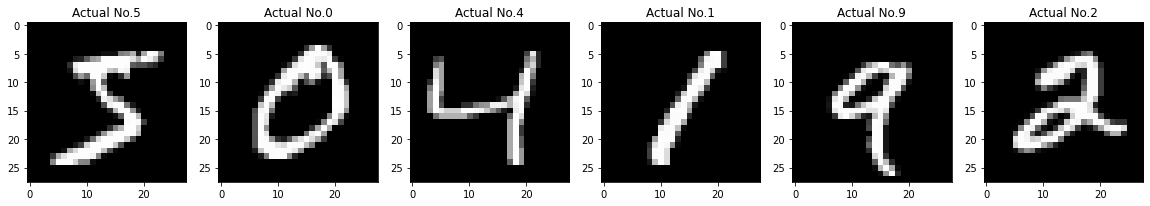

In [5]:
plt.figure(figsize=(20,5))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(1, 6, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Actual No.%s" % label)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2) 

In [7]:
mdl = LogisticRegression(solver="lbfgs",max_iter=126)
mdl.fit(X_train,y_train)
prediction = mdl.predict(X_test)
score = mdl.score(X_test, y_test) 
print(score)

0.9178571428571428


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
print("Accurcay is :",round(score,2)*100,"%")

Accurcay is : 92.0 %


prediction: 8


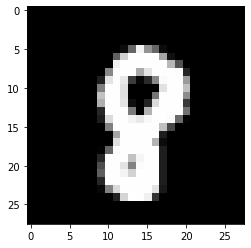

In [9]:
index = 3
plt.imshow(np.reshape(X_test[index],(28,28)), cmap = "gray")
print("prediction: " + mdl.predict([X_test[index]])[0])

In [10]:
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[1307,    0,    4,    5,    2,   12,   11,    3,    6,    2],
       [   0, 1563,    9,    5,    3,    7,    0,    6,   17,    3],
       [  12,   12, 1289,   25,   16,    7,   18,   18,   35,    8],
       [   2,    4,   30, 1265,    1,   55,    4,    8,   36,   15],
       [   5,    4,    4,    4, 1255,    1,   13,    4,   15,   59],
       [  17,    2,    7,   51,    6, 1091,   18,    5,   50,   11],
       [  10,    5,   13,    0,   13,   17, 1292,    1,    3,    3],
       [   6,    8,   18,    8,    9,    2,    0, 1322,    7,   43],
       [  11,   29,   16,   44,    6,   45,   20,    6, 1211,   17],
       [   8,    4,    4,   16,   27,   10,    0,   32,   12, 1255]])

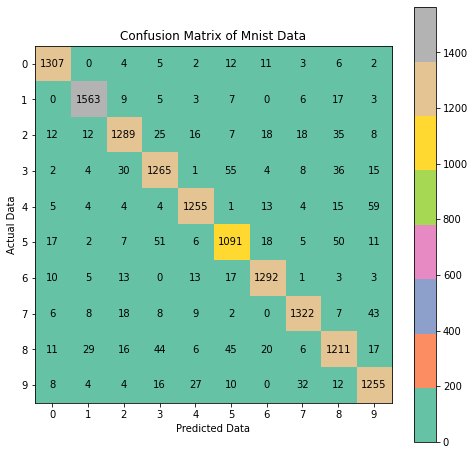

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap="Set2")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.colorbar()

plt.title("Confusion Matrix of Mnist Data")

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center',verticalalignment='center')